In [1]:
import CombinedFCToolBox as cfc
import h5py
import numpy as np
import time
import matplotlib.pyplot as plt

# Results
## Validating combinedFC using simulations


Run N repetitions for a simulation model defined by a set of parameters.
Correlation, partial correlation and combinedFC are applied to the simulated data.
Precision and recall is computed for each N repetition, for the three methods.

The study assumes that one parameter is going to be analyzed at different values,
while keeping the rest of the parameters fixed at one specified value.

### Code to reproduce Figure 2c-f

/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in th

running time 80.35454392433167 seconds


/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output


running time 180.41690802574158 seconds


/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in th

running time 269.0402901172638 seconds


/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolB

running time 351.5099937915802 seconds


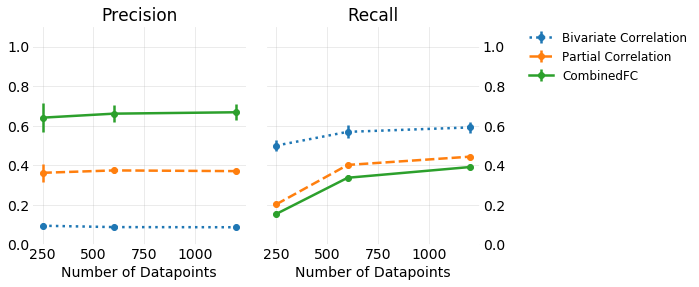

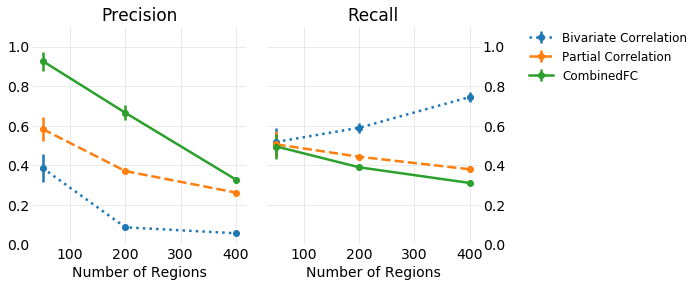

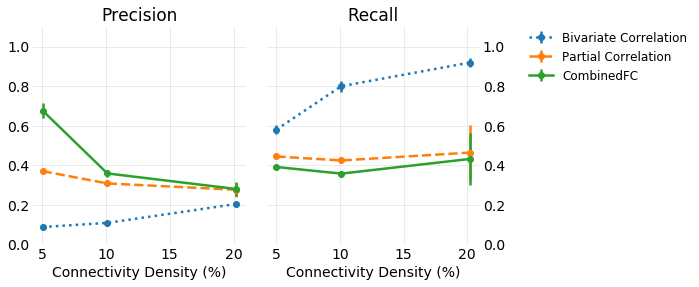

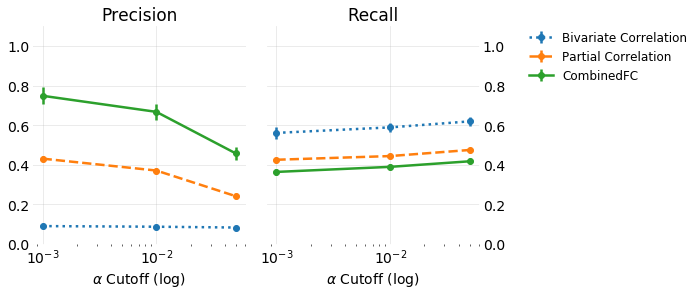

In [9]:

t = time.time()

#set up parameters for the simulations. 
#Defined here, since they will also be used in the plots
#the parameters defined as arrays (in []) are the ones analyzed

#
for i in range(4):
    
    #number of simulations
    repetitions=100
    #model
    model='ErdosRenyi'
   
    #parameters to be analyzed at different values
    if i == 0:
        nNodes = [200]
        nDatapoints = [250,600,1200]  #the three values that will be analyzed
        edgeDensity='fixed'
        #significance level
        alphaSig = [0.01]
    elif i == 1:
        nNodes = [50,200,400]
        nDatapoints = [1200]  
        edgeDensity='fixed'
        alphaSig = [0.01]
    elif i == 2:
        nNodes = [200]
        nDatapoints = [1200] 
        edgeDensity='profile' #for the three connectivity density levels
        alphaSig = [0.01]
    elif i == 3:
        nNodes = [200]
        nDatapoints = [1200]
        edgeDensity='fixed'
        #significance level
        alphaSig = [0.001,0.01,0.05]
        
        
    
    dataType = 'pseudoEmpirical'
    #coefficients for the data
    mean_coeff = 0.8 
    std_coeff = 1
    #define the conditional association method
    methodCondAsso = 'partialCorrelation'
    #if partial correlation define the method
    methodParcorr='inverseCovariance'
    #define the unconditional association method
    methodAsso = 'correlation'
    #True if equivalence test for correlation
    cfcEquivalenceTest = False
    #minimum effect of interest for correlation
    equiv_bounds = [0.2]
    #run the simulation with the given parameters
    [Accuracy_Asso, Accuracy_condAsso, Accuracy_combfc, nEdges] = cfc.simulation(
                                                                                repetitions = repetitions,
                                                                                model = model,
                                                                                nNodes = nNodes, 
                                                                                nDatapoints = nDatapoints,
                                                                                edgeDensity = edgeDensity,
                                                                                mean_coeff = mean_coeff,
                                                                                std_coeff = std_coeff,
                                                                                dataType = dataType,
                                                                                methodCondAsso = methodCondAsso,
                                                                                methodParcorr = methodParcorr,
                                                                                methodAsso = methodAsso,
                                                                                alphaSig = alphaSig,
                                                                                cfcEquivalenceTest = cfcEquivalenceTest,
                                                                                equiv_bounds = equiv_bounds
                                                                                )

    print(f'running time {time.time() - t} seconds')

    #Plot figures for average precision and recall across N repetitions

    #define main figure and subplots, one for precision and one for recall
    fig, (ax1,ax2) = plt.subplots(1, 2)
    #adjust whitespace between subplots
    plt.subplots_adjust(wspace=0.1)
    #size of the figure
    fig.set_size_inches(8, 4)

    for j in range(3):   
        if j == 0:
            method = 'Bivariate Correlation'
            acc_results = Accuracy_Asso
            linestyle = 'dotted'
        elif j == 1:
            method = 'Partial Correlation'
            acc_results = Accuracy_condAsso
            linestyle = 'dashed'
        elif j == 2:
            method = 'CombinedFC'
            acc_results = Accuracy_combfc
            linestyle = 'solid'

        cfc.plotAvgPrecisionRecall(
                                   ax1 = ax1,
                                   ax2 = ax2,
                                   nEdges = nEdges, 
                                   nNodes = nNodes,
                                   nDatapoints = nDatapoints,
                                   alphaSig = alphaSig,
                                   equiv_bounds = equiv_bounds,
                                   precision = acc_results[:,:,:,:,:,:,0],
                                   recall = acc_results[:,:,:,:,:,:,1],
                                   method = method,
                                   linestyle = linestyle,
                                   marker = 'o'
                                   )
#ax2.get_legend().remove()

### Code to reproduce Figure 3c-f

/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBo

running time 82.69509696960449 seconds


/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBo

running time 185.9904294013977 seconds


/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolB

running time 271.1636598110199 seconds


/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBox/partialCorrelationSig.py:47: RuntimeWarning: invalid value encountered in greater_equal
  M = np.multiply(Mparcorr, abs(Fz) >= Zalpha) + 0 #+0 is to avoid -0 in the output
/home/rubens/scripts/CombinedFCToolBox/parCorrInvCov.py:22: RuntimeWarning: invalid value encountered in sqrt
  denom = np.atleast_2d(1. / np.sqrt(np.diag(invCovM)))
/home/rubens/scripts/CombinedFCToolBox/fisherZTrans.py:20: RuntimeWarning: invalid value encountered in arctanh
  Fz = np.multiply(np.subtract(np.arctanh(r),np.arctanh(Ho)), np.sqrt(nDatapoints-condSetSize-3))
/home/rubens/scripts/CombinedFCToolBo

running time 355.1144335269928 seconds


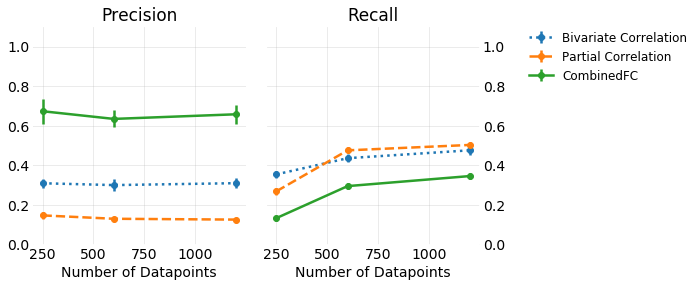

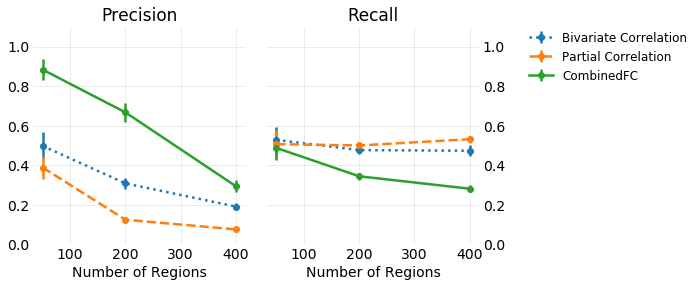

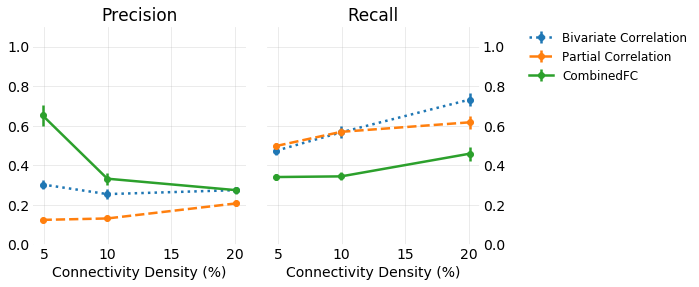

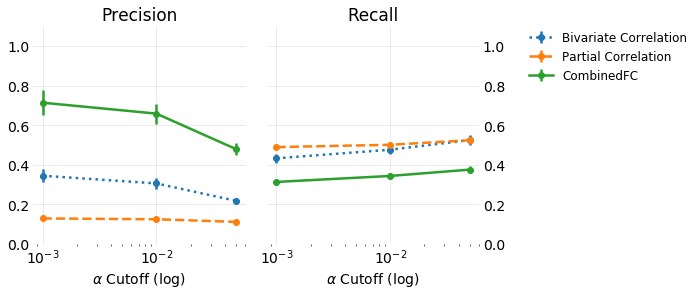

In [10]:
t = time.time()

#set up parameters for the simulations. 
#Defined here, since they will also be used in the plots
#the parameters defined as arrays (in []) are the ones analyzed

#
for i in range(4):
    
    #number of simulations
    repetitions=100
    #model
    model='StaticPowerLaw'
   
    #parameters to be analyzed at different values
    if i == 0:
        nNodes = [200]
        nDatapoints = [250,600,1200]  #the three values that will be analyzed
        edgeDensity='fixed'
        #significance level
        alphaSig = [0.01]
    elif i == 1:
        nNodes = [50,200,400]
        nDatapoints = [1200]  
        edgeDensity='fixed'
        alphaSig = [0.01]
    elif i == 2:
        nNodes = [200]
        nDatapoints = [1200] 
        edgeDensity='profile' #for the three connectivity density levels
        alphaSig = [0.01]
    elif i == 3:
        nNodes = [200]
        nDatapoints = [1200]
        edgeDensity='fixed'
        #significance level
        alphaSig = [0.001,0.01,0.05]
        
        
    
    dataType = 'pseudoEmpirical'
    #coefficients for the data
    mean_coeff = 0.8 
    std_coeff = 1
    #define the conditional association method
    methodCondAsso = 'partialCorrelation'
    #if partial correlation define the method
    methodParcorr='inverseCovariance'
    #define the unconditional association method
    methodAsso = 'correlation'
    #True if equivalence test for correlation
    cfcEquivalenceTest = False
    #minimum effect of interest for correlation
    equiv_bounds = [0.2]
    #run the simulation with the given parameters
    [Accuracy_Asso, Accuracy_condAsso, Accuracy_combfc, nEdges] = cfc.simulation(
                                                                                repetitions = repetitions,
                                                                                model = model,
                                                                                nNodes = nNodes, 
                                                                                nDatapoints = nDatapoints,
                                                                                edgeDensity = edgeDensity,
                                                                                mean_coeff = mean_coeff,
                                                                                std_coeff = std_coeff,
                                                                                dataType = dataType,
                                                                                methodCondAsso = methodCondAsso,
                                                                                methodParcorr = methodParcorr,
                                                                                methodAsso = methodAsso,
                                                                                alphaSig = alphaSig,
                                                                                cfcEquivalenceTest = cfcEquivalenceTest,
                                                                                equiv_bounds = equiv_bounds
                                                                                )

    print(f'running time {time.time() - t} seconds')

    #Plot figures for average precision and recall across N repetitions

    #define main figure and subplots, one for precision and one for recall
    fig, (ax1,ax2) = plt.subplots(1, 2)
    #adjust whitespace between subplots
    plt.subplots_adjust(wspace=0.1)
    #size of the figure
    fig.set_size_inches(8, 4)

    for j in range(3):   
        if j == 0:
            method = 'Bivariate Correlation'
            acc_results = Accuracy_Asso
            linestyle = 'dotted'
        elif j == 1:
            method = 'Partial Correlation'
            acc_results = Accuracy_condAsso
            linestyle = 'dashed'
        elif j == 2:
            method = 'CombinedFC'
            acc_results = Accuracy_combfc
            linestyle = 'solid'

        cfc.plotAvgPrecisionRecall(
                                   ax1 = ax1,
                                   ax2 = ax2,
                                   nEdges = nEdges, 
                                   nNodes = nNodes,
                                   nDatapoints = nDatapoints,
                                   alphaSig = alphaSig,
                                   equiv_bounds = equiv_bounds,
                                   precision = acc_results[:,:,:,:,:,:,0],
                                   recall = acc_results[:,:,:,:,:,:,1],
                                   method = method,
                                   linestyle = linestyle,
                                   marker = 'o'
                                   )

## Applying combinedFC to empirical resting state fMRI data
### Load data

In [13]:
#directory of the hcp data in h5 format
datadir = 'CombinedFCToolBox/hcp_data'
#labels for the pool of 100 hcp subjects
#consider using an os function to read the files directly from the folder
subjects = ['100206','108020','117930','126325','133928','143224','153934','164636','174437',
            '183034','194443','204521','212823','268749','322224','385450','463040','529953',
            '587664','656253','731140','814548','877269','978578','100408','108222','118124',
            '126426','134021','144832','154229','164939','175338','185139','194645','204622',
            '213017','268850','329844','389357','467351','530635','588565','657659','737960',
            '816653','878877','987074','101006','110007','118225','127933','134324','146331',
            '154532','165638','175742','185341','195445','205119','213421','274542','341834',
            '393247','479762','545345','597869','664757','742549','820745','887373','989987',
            '102311','111009','118831','128632','135528','146432','154936','167036','176441',
            '186141','196144','205725','213522','285345','342129','394956','480141','552241',
            '598568','671855','744553','826454','896879','990366','102513','112516','118932',
            '129028']

#just use one resting state run             
restRuns = ['rfMRI_REST1_RL'] #'rfMRI_REST1_LR','rfMRI_REST2_RL', 'rfMRI_REST2_LR']

#initialize a list that will contain the nSubjects datasets
group_restData = []

#extract individual datasets and populate the list
for subject in subjects:
    h5file = h5py.File(f'{datadir}/{subject}_data.h5','r')
    rest_data = []
    for run in restRuns:
        #extract the resting-state data, [:] loads it as an array
        tmp = h5file[f'{run}/nuisanceReg_resid_24pXaCompCorXVolterra'][:]
        #concatenate the resting state datasets
        rest_data.extend(tmp.T)
        #save the 360 regions(nodes) x  nDatapoints dataset (1195 datapoints per run)
        rest_data = np.asarray(rest_data).T
        h5file.close()
    
    #transpose to get in dimensions nDatapoints x nNodes
    #append to the list
    group_restData.append(rest_data.T)

### Group analysis : 10, 40, 70 and 100 subjects

In [14]:
#start running time counter
t = time.time()

#analysis across increasing number of subjects, max = 100
groupSize = [10,40,70,100]

#lists to save the results for each value of groupSize
group_results_corr = []
group_results_parcorr = []
#combinedFC with non-significant correlations
group_results_cfcNonSig = []
#combinedFC with equivalence test
group_results_cfcEqTest = []


#define general parameters for the methods
alpha = 0.01  #significance cutoff  (for all the methods)
methodParcorr = 'inverseCovariance'  #or 'regression' for partial correlation
eqBound = 0.2 #absolute value of minimum correlation of interest, for equivalence test.
alphaEqTest = 0.01  #significance cutoff for the Equivalence test


#loop through all the different group sizes defined in the groupSize variable
for g in groupSize:
    
    #correlation
    gSigCorr = cfc.groupCorrSig(group_restData[:g],alpha = alpha)
    #save the results for each element of groupSize       
    group_results_corr.append(gSigCorr)
    
    #partial correlation
    gSigParcorr = cfc.groupParcorrSig(group_restData[:g], method = methodParcorr, alpha = alpha)
    group_results_parcorr.append(gSigParcorr)
    
    #combinedFC with non significant correlations
    gCFCnonSig = cfc.groupCombinedFC(group_restData[:g], 
                                     alpha = alpha, 
                                     methodParcorr = methodParcorr, 
                                     equivalenceTest = False)
    
    group_results_cfcNonSig.append(gCFCnonSig)
    
    #combinedFC with equivalence test
    gCFCeqTest = cfc.groupCombinedFC(group_restData[:g], 
                                     alpha = alpha, 
                                     methodParcorr = methodParcorr, 
                                     equivalenceTest = True,
                                     lower_bound = -eqBound, 
                                     upper_bound = +eqBound,
                                     alphaEqTest = alphaEqTest)
    
    group_results_cfcEqTest.append(gCFCeqTest)
    

print(f'running time: {time.time() - t} seconds')
print(f'group analyses for: {groupSize} subjects')
print(f'alpha = {alpha}')
print(f'absolute minimum correlation of interest = {eqBound}')
print(f'alpha for equivalence test = {alphaEqTest}')

running time: 355.5731191635132 seconds
group analyses for: [10, 40, 70, 100] subjects
alpha = 0.01
absolute minimum correlation of interest = 0.2
alpha for equivalence test = 0.01


### Code for Figure 4

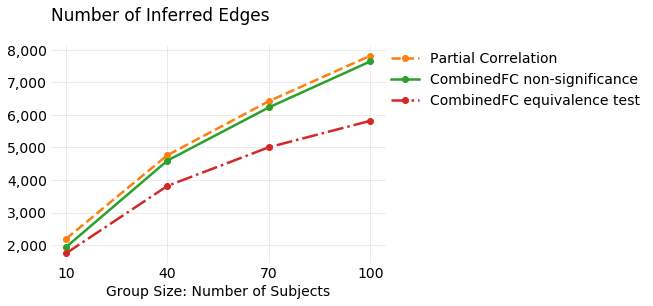

 
Group Size: Number of Subjects
[10, 40, 70, 100]
Number of Inferred Edges
corr: [45120.0, 58019.0, 60442.0, 61206.0]
parcorr: [2188.0, 4760.0, 6419.0, 7815.0]
cfc_nonsig: [1935.0, 4594.0, 6228.0, 7640.0]
cfc_eqtest: [1744.0, 3816.0, 5004.0, 5816.0]


In [16]:
#get and plot the number of significant edges inferred by each method
#Figure 4 in the manuscript

nEdgesCorr = []
nEdgesParcorr = []
nEdgesCFCNonSig = []
nEdgesCFCEqTest = []
for i in range(len(groupSize)):
    #divide by 2 because the matrices are symmetric
    nEdgesCorr.append(np.sum(group_results_corr[i] != 0)/2)
    nEdgesParcorr.append(np.sum(group_results_parcorr[i] != 0)/2)
    nEdgesCFCNonSig.append(np.sum(group_results_cfcNonSig[i] != 0)/2)
    nEdgesCFCEqTest.append(np.sum(group_results_cfcEqTest[i] != 0)/2)

fig,ax = plt.subplots()
#parameters for the plot
ax.set_xlabel('Group Size: Number of Subjects',fontsize=14)
#ax.set_ylabel('Number of Inferred Edges',fontsize=14)
ax.tick_params(grid_alpha=0.3,labelsize=14,length=0.01)
ax.grid(True)
ax.set_xticks([10,40,70,100],minor=False)
#comma format for the y-axis ticks
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
#remove the axis borders
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_visible(False)
#plot the data
#ax.plot(groupSize,nEdgesCorr,color='C0',label = 'Bivariate Correlation',linewidth=2.5)
ax.plot(groupSize,nEdgesParcorr,color='C1',label = 'Partial Correlation',linewidth=2.5,marker='o',linestyle='dashed')
ax.plot(groupSize,nEdgesCFCNonSig,color='C2',label = 'CombinedFC non-significance',linewidth=2.5,marker='o',linestyle='solid')
ax.plot(groupSize,nEdgesCFCEqTest,color='C3', label = 'CombinedFC equivalence test',linewidth=2.5,marker='o',linestyle='dashdot')
ax.legend()
ax.set_title('Number of Inferred Edges',fontsize=17,pad=25,loc='left')
ax.legend(bbox_to_anchor=(1, 1),fontsize=14, borderaxespad=0, frameon=False)
plt.savefig('GroupSize_Analysis',dpi=300,bbox_inches='tight')


plt.show()

#results in text format
print(' ')
print('=========================')
print('Group Size: Number of Subjects')
print(groupSize)
print('Number of Inferred Edges')
print(f'corr: {nEdgesCorr}')
print(f'parcorr: {nEdgesParcorr}')
print(f'cfc_nonsig: {nEdgesCFCNonSig}')
print(f'cfc_eqtest: {nEdgesCFCEqTest}')
print('=========================')

### Code to reproduce Figure 5a-c
Plot connectivity matrices for the 100 subjects group, for each method.

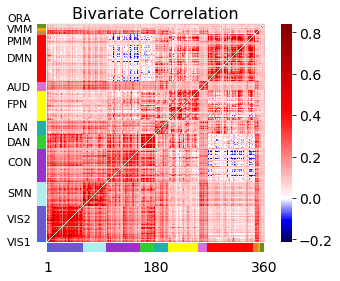

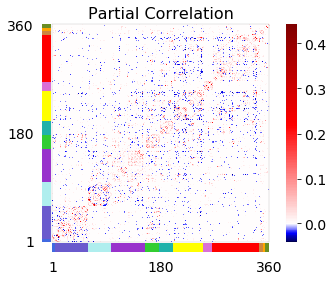

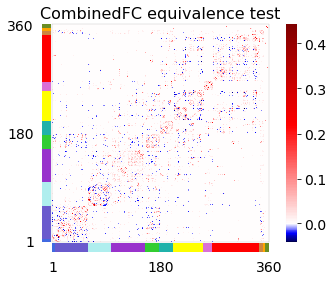

In [18]:

#Figure 5a
fig,ax = cfc.plotConnectivityMatrix(group_results_corr[3],
                             methodTitle='Bivariate Correlation',
                             networkColorBar_x = True,
                             networkColorBar_y = True,
                             networkLabels = True)

fig.show()

#Figure 5b
fig,ax = cfc.plotConnectivityMatrix(group_results_parcorr[3],
                             methodTitle='Partial Correlation',
                             networkColorBar_x = True,
                             networkColorBar_y = True,
                             networkLabels = False)
fig.show()
#remove the y-axis ticks labels
#ax.get_yaxis().set_ticks([])

#Figure 5c
fig,ax = cfc.plotConnectivityMatrix(group_results_cfcEqTest[3],
                                methodTitle='CombinedFC equivalence test',
                                networkColorBar_x = True,
                                networkColorBar_y = True,
                                networkLabels = False)
fig.show()
#remove the y-axis ticks labels
#ax.get_yaxis().set_ticks([])

### Code to reproduce Figure 5d

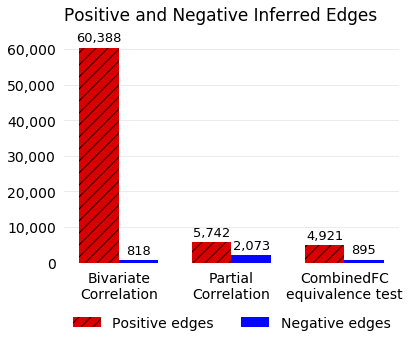



Positive and negative edges for the 100 subjects group analysis
corr edges      : +60388.0 || -818.0
parcorr edges    : +5742.0 || -2073.0
cfc_nonSig edges : +5707.0 || -1933.0
cfc_EqTests edges : +4921.0 || -895.0


In [26]:
from matplotlib import cm

labels = ['Bivariate\nCorrelation','Partial\nCorrelation', 'CombinedFC\nequivalence test']
pos_edges = [np.sum(group_results_corr[3]>0)/2, 
             np.sum(group_results_parcorr[3]>0)/2, 
             np.sum(group_results_cfcEqTest[3]>0)/2]
neg_edges = [np.sum(group_results_corr[3]<0)/2, 
             np.sum(group_results_parcorr[3]<0)/2, 
             np.sum(group_results_cfcEqTest[3]<0)/2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

positiveBars = ax.bar(x - width/2, np.round(pos_edges,0).astype(int), width, label='Positive edges',color=[217/256,0,0],hatch="//")
negativeBars = ax.bar(x + width/2, np.round(neg_edges,0).astype(int), width, label='Negative edges',color=[6/256,6/256,254/256])

#ax.set_ylabel('% of total inferred edges',fontsize=14)
ax.set_title('Positive and Negative Inferred Edges',fontsize=17,pad=25,loc='left')
ax.tick_params(grid_alpha=0.3,labelsize=14,length=0.01,pad=8)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([-10,61000])
ax.legend()
ax.legend(fontsize=14, borderaxespad=0, frameon=False,ncol=2,loc='upper center',bbox_to_anchor=(0.5,-0.22))
#ax.legend(fontsize=14, borderaxespad=0, frameon=False,ncol=1, bbox_to_anchor=(1.5,1))
#to send the grids lines behind the bar plot
ax.set_axisbelow(True)
ax.grid(True, axis='y')
#remove the axis lines
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_visible(False)
        
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

         
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=13)

autolabel(positiveBars)
autolabel(negativeBars)

plt.show()
print('\n\nPositive and negative edges for the 100 subjects group analysis')
print('===========================================')
print(f'corr edges      : +{np.sum(group_results_corr[3]>0)/2} || -{np.sum(group_results_corr[3]<0)/2}')
print(f'parcorr edges    : +{np.sum(group_results_parcorr[3]>0)/2} || -{np.sum(group_results_parcorr[3]<0)/2}')
print(f'cfc_nonSig edges : +{np.sum(group_results_cfcNonSig[3]>0)/2} || -{np.sum(group_results_cfcNonSig[3]<0)/2}')
print(f'cfc_EqTests edges : +{np.sum(group_results_cfcEqTest[3]>0)/2} || -{np.sum(group_results_cfcEqTest[3]<0)/2}')